In [15]:
import os
import glob
import shutil

import numpy as np
import matplotlib.pyplot as plt

from scipy.stats.stats import pearsonr

In [2]:
pulsar_name = '0531+21'
files = sorted(glob.glob('results_by_08.05.2019/gp_plot_txt/*' + pulsar_name + '*.csv'))

In [11]:
def read_head(filename, rows):
    with open(filename, 'r') as file:
        header = {}
        for i in range(rows):
            a, *b = file.readline().split()
            try:
                header[a] = b[0] + '.' + b[1]
            except IndexError:
                header[a] = b[0].replace(',', '.')
    return header

In [3]:
pat_1 = np.genfromtxt('pattern_1.csv', skip_header=6)
pat_1 = pat_1/max(pat_1)
pat_2 = np.genfromtxt('pattern_2.csv', skip_header=6)
pat_2 = pat_2/max(pat_2)
pat_3 = np.genfromtxt('pattern_3.csv', skip_header=6)
pat_3 = pat_3/max(pat_3)
pat_4 = np.genfromtxt('pattern_4.csv', skip_header=6)
pat_4 = pat_4/max(pat_4)

In [7]:
pearsonr(pat_1, pat_4)

(0.9197482172313327, 1.374079525119229e-41)

ValueError: operands could not be broadcast together with shapes (100,) (96,) 

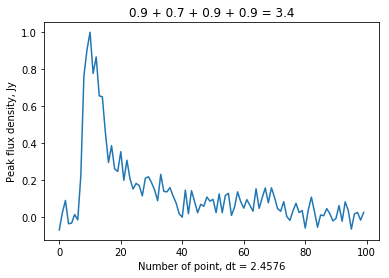

In [17]:
try:
    shutil.rmtree('./pearsonr_pulse_' + pulsar_name)
except FileNotFoundError:
    print('Directory doesn\'t exist')
os.mkdir('./pearsonr_pulse_' + pulsar_name)
for file in files:
    head = read_head(file, 3)
    profile = np.genfromtxt(file, skip_header=6)
    profile = profile/max(profile)
    
    pear_1 = round(pearsonr(pat_1, profile)[0], 1)
    pear_2 = round(pearsonr(pat_2, profile)[0], 1)
    pear_3 = round(pearsonr(pat_3, profile)[0], 1)
    pear_4 = round(pearsonr(pat_4, profile)[0], 1)
    
    sum_pear = round(pear_1 + pear_2 + pear_3 + pear_4, 2)
    
    plt.close()
    plt.title('{} + {} + {} + {} = {}'.format(pear_1, pear_2, pear_3, pear_4, sum_pear))
    plt.xlabel('Number of point, dt = ' + head['tay'])
    plt.ylabel('Peak flux density, Jy')
    plt.plot(profile)
    plt.savefig('./pearsonr_pulse_'
                + pulsar_name
                + os.sep
                + os.path.basename(file)[:-4]
                + '.png', format='png')